In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
import seaborn as sns

$\frac{ \hat{v}_j Z }{ \sqrt{\hat{\lambda}_j}}$ should behave like standard normal for all eigenvalues if the fitting model is true.

In [27]:
# Specify the number of points along each axis
n= 100
x_min = 0
y_min = 0
x_max = 100
y_max = 100
theta =3
range_val = 3
num_points_x, num_points_y = n, n

# Generate a regular grid using linspace
x = np.linspace(x_min, x_max, num_points_x)
y = np.linspace(y_min, y_max, num_points_y)

# d = np.sqrt( (x[:, None] - x)**2 + (y[:, None] - y**2) )
d = np.sqrt((x[:, None] - x)**2 + (y[:, None] - y)**2)
print(d)
# 1) 
cov_mat1 = theta * np.exp(-d/range_val)
cov_mat2 = theta * np.exp( -(d/range_val)**2)
cov_mat3 = theta * (1 + d/range_val) * np.exp(-d/range_val)

cov_list = [cov_mat1, cov_mat2, cov_mat3]

eigen_values_1, eigenvectors_1 = np.linalg.eig(cov_mat1)
eigen_values_2, eigenvectors_2 = np.linalg.eig(cov_mat2)
eigen_values_3, eigenvectors_3 = np.linalg.eig(cov_mat3)


print(eigen_values_2)

[[  0.           1.42849855   2.8569971  ... 138.56435914 139.99285769
  141.42135624]
 [  1.42849855   0.           1.42849855 ... 137.13586059 138.56435914
  139.99285769]
 [  2.8569971    1.42849855   0.         ... 135.70736205 137.13586059
  138.56435914]
 ...
 [138.56435914 137.13586059 135.70736205 ...   0.           1.42849855
    2.8569971 ]
 [139.99285769 138.56435914 137.13586059 ...   1.42849855   0.
    1.42849855]
 [141.42135624 139.99285769 138.56435914 ...   2.8569971    1.42849855
    0.        ]]
[1.11553199e+01 1.11202665e+01 1.10620889e+01 1.09811516e+01
 1.08779598e+01 1.07531534e+01 1.06075013e+01 1.04418929e+01
 1.02573294e+01 1.00549134e+01 9.83583811e+00 9.60137562e+00
 9.35286465e+00 9.09169780e+00 8.81930865e+00 8.53715876e+00
 8.24672472e+00 7.94948553e+00 7.64691027e+00 7.34044642e+00
 7.03150872e+00 6.72146892e+00 6.41164628e+00 6.10329913e+00
 5.79761734e+00 5.49571592e+00 5.19862965e+00 4.90730884e+00
 4.62261617e+00 4.34532458e+00 4.07611618e+00 3.81558

In [41]:
def my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, cov_index=1):

    # Specify the number of points along each axis
    num_points_x, num_points_y = n, n

    # Generate a regular grid using linspace
    x = np.linspace(x_min, x_max, num_points_x)
    y = np.linspace(y_min, y_max, num_points_y)
    
    d = np.sqrt( (x[:, None] - x)**2 + (y[:, None] - y)**2 )  + 1e-8

    # 1) 
    cov_mat1 = theta * np.exp(-d/range_val)
    cov_mat2 = theta * np.exp( -(d/range_val)**2)
    cov_mat3 = theta * (1 + d/range_val) * np.exp(-d/range_val)

    cov_list = [cov_mat1, cov_mat2, cov_mat3]

    eigen_values_1, eigenvectors_1 = np.linalg.eig(cov_mat1)
    eigen_values_2, eigenvectors_2 = np.linalg.eig(cov_mat2)
    eigen_values_3, eigenvectors_3 = np.linalg.eig(cov_mat3)

    np.random.seed(42)
    sim_data = multivariate_normal(mean=np.zeros(n), cov=cov_list[cov_index]).rvs()
    # multivariate_normal is a function from scipy.stats module 
    #. rvs() generate random samples from specifed function
    # .T transpose 

    tmp1 = np.zeros(n)
    tmp2 = np.zeros(n)
    tmp3 = np.zeros(n)

    for i in range(n):
        tmp1[i] = np.dot(np.transpose(eigenvectors_1[:, i]), sim_data) / eigen_values_1[i]**(1/2)
        tmp2[i] = np.dot(np.transpose(eigenvectors_2[:, i]), sim_data) / eigen_values_2[i]**(1/2)
        tmp3[i] = np.dot(np.transpose(eigenvectors_3[:, i]), sim_data) / eigen_values_3[i]**(1/2)
        tmp1[i] = np.log(tmp1[i]**2)
        tmp2[i] = np.log(tmp2[i]**2)
        tmp3[i] = np.log(tmp3[i]**2)

    data = pd.DataFrame({'x': np.arange(1, n+1), 'y1': tmp1, 'y2': tmp2, 'y3': tmp3})

 
    # Assuming data is already defined

    plt.figure(figsize=(15, 5))

    # Line 1
    sns.scatterplot(x='x', y='y1', data=data, alpha=0.7, color='red', label='Separable model')
    sns.regplot(x='x', y='y1', data=data, scatter=False, color='red')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Line 2
    sns.scatterplot(x='x', y='y2', data=data, alpha=0.7, color='green', label='Smoother along axes')
    sns.regplot(x='x', y='y2', data=data, scatter=False, color='green')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Line 3
    sns.scatterplot(x='x', y='y3', data=data, alpha=0.7, color='blue', label='Lacking full symmetry')
    sns.regplot(x='x', y='y3', data=data, scatter=False, color='blue')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Add labels, title, and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Smoothed Lines for y1,y2 and y3')
    plt.legend()

    plt.tight_layout()
    plt.show()


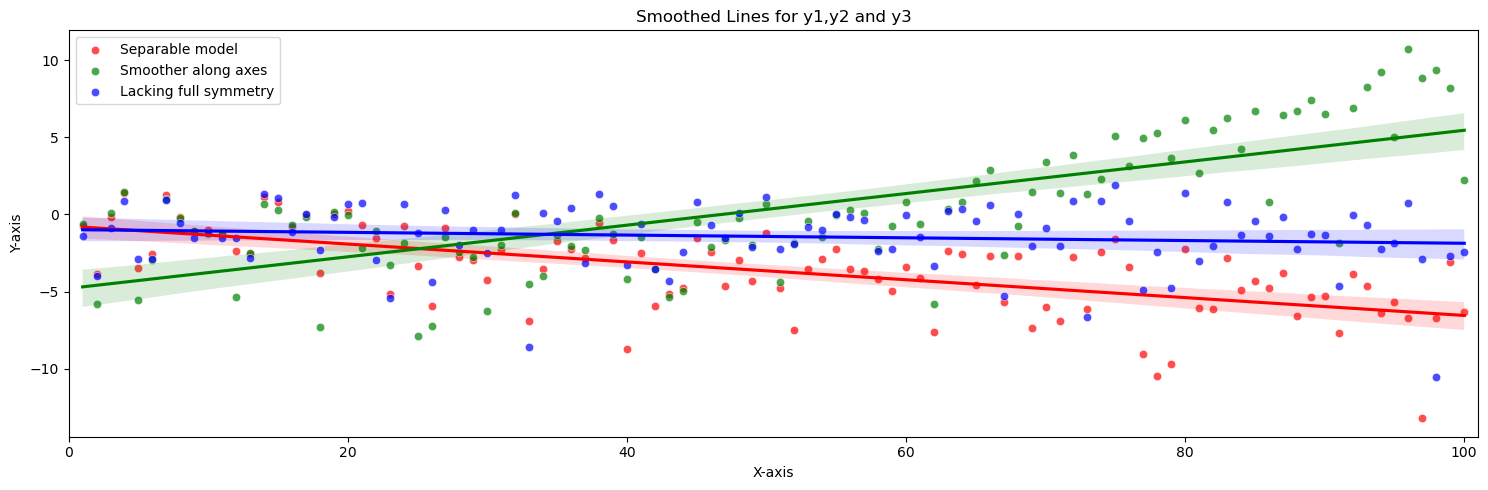

In [44]:
# Example usage
my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=100, theta=3, range_val=4, cov_index=2)